# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.float_format = '{:,.1f}'.format

In [2]:
#Чтение CSV файла
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Вывод первых строк таблицы
print("Первый взгляд на данные:")
display(df.head(10))

Первый взгляд на данные:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


In [5]:
#Статистика по исходным данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# Проверка на дубликаты
print(f"Количество дубликатов: {df.duplicated().sum()}")

Количество дубликатов: 0


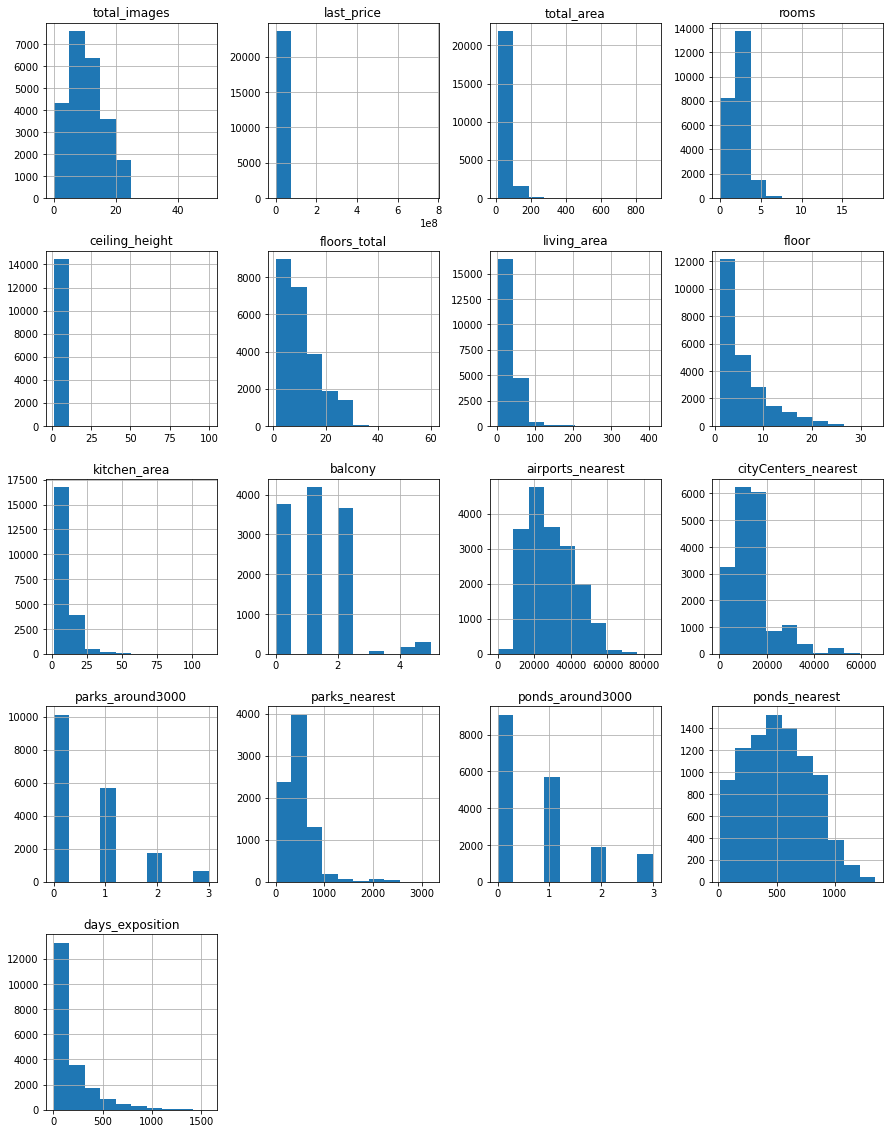

In [7]:
#Общая гистограмма для всех столбцов
df.hist(figsize=(15, 20));

Исходные данные представляют собой таблицу из 23699 строк и 22 столбцов с разделителем в CSV-файле – символ табуляции \t. 
По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют.
Предварительный анализ данных показывает множество пустых значений, которые будут обработаны далее.

### Предобработка данных

Посмотрим количество пропусков

**Количество пропусков перед предобработкой**

In [8]:
#Было
#df.isna().sum()

#Стало
# Подсчёт пропусков в количестве и процентах
missing_data = df.isna().sum().reset_index()
missing_data.columns = ['Column', 'Missing_Count']
missing_data['Missing_Percentage'] = (missing_data['Missing_Count'] / len(df)) * 100

# Вывод данных
print(missing_data)

                  Column  Missing_Count  Missing_Percentage
0           total_images              0                 0.0
1             last_price              0                 0.0
2             total_area              0                 0.0
3   first_day_exposition              0                 0.0
4                  rooms              0                 0.0
5         ceiling_height           9195                38.8
6           floors_total             86                 0.4
7            living_area           1903                 8.0
8                  floor              0                 0.0
9           is_apartment          20924                88.3
10                studio              0                 0.0
11             open_plan              0                 0.0
12          kitchen_area           2278                 9.6
13               balcony          11519                48.6
14         locality_name             49                 0.2
15      airports_nearest           5542 

Переименуем название столбца cityCenters_nearest на city_centers_nearest

In [9]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

Переводим явные столбцы данных в целочисленный тип данных

In [10]:
df['total_images'].astype('int')
df['last_price'].astype('int')
df['total_area'].round(2)

0       108.0
1        40.4
2        56.0
3       159.0
4       100.0
         ... 
23694   133.8
23695    59.0
23696    56.7
23697    76.8
23698    32.3
Name: total_area, Length: 23699, dtype: float64

**first_day_exposition**

Причина: Cкорее всего объект не продан или объявления могли быть сняты до указания времени публикации.

Решение: Оставить пропуски 

In [11]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

**ceiling_height**

Причина: Пользователи могли не указывать эту информацию, если она не важна для продажи.

Решение: Заменить на медианное значение, так как это непрерывный параметр с небольшим влиянием на основные выводы.

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [14]:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10

**floors_total**

In [15]:
#Дропаем строки
df.dropna(subset=['floors_total'],inplace=True)

**living_area**

Причина: Возможно, пользователи не всегда точно знают жилую площадь.

Решение: Рассчитать на основе медианны living_area.

In [16]:
#Группируем наши данные по количеству комнат
living_area_nna=df.loc[~df['living_area'].isnull()]
grouped_rooms=living_area_nna.pivot_table(index='rooms', 
                                            values='living_area', aggfunc='median')

In [17]:
grouped_rooms

,living_area
rooms,
0,18.0
1,17.6
2,30.5
3,45.0
4,63.5
5,91.8
6,124.4
7,145.0
8,161.0


In [18]:
#Заполняем медианными значениями пропуски
for rooms in grouped_rooms.index:
    median = grouped_rooms.loc[rooms]['living_area']
    df.loc[df['rooms'] == rooms, 'living_area'] = df[df['rooms'] == rooms]['living_area'].fillna(median)

**is_apartment**

Причина: Мало кто указывает, что продает именно апартаменты.

Решение: Заменить на False, так как отсутствие значения логично трактовать как "не апартаменты".

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
df['is_apartment'] = df['is_apartment'].astype(bool)

**kitchen_area**

Причина: Пользователи могли не указывать площадь кухни так как живут в студии, где нет кухни.

Решение: Заполнить пропуски 0.

In [20]:
# Найдем зависимость столбцов друг от друга при помощи корреляции Пирсона.
print(df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())

kitchen_area     1.0
total_area       0.6
last_price       0.5
living_area      0.4
ceiling_height   0.3
Name: kitchen_area, dtype: float64


In [21]:
#Было
#df['kitchen_area'] = df['kitchen_area'].fillna(0)
#df['kitchen_area'].round(2)

#Стало
#Считаем средний коэфф 
avg_kitchen_area = (df['kitchen_area']/df['total_area']).median()
#Считаем площадь через средний коэффицент
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[
    df['kitchen_area'].isna(), 'total_area'
    ] * avg_kitchen_area
df['kitchen_area'].round(2)

0       25.0
1       11.0
2        8.3
3       27.4
4       41.0
        ... 
23694   13.8
23695    8.5
23696    9.8
23697   23.3
23698    9.0
Name: kitchen_area, Length: 23613, dtype: float64

**balcony**

Причина: Пользователи могли не указывать количество, если балконов нет.

Решение: Заменить на 0, если пропущено.

In [22]:
df['balcony'].fillna(0, inplace=True)

**locality_name**

Причина: Ошибка ввода или отсутствие данных.

Решение: Заполнить пропущенные значения 'unknown'. Избавиться от неявных дубликатов.

In [23]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [24]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [25]:
df.locality_name = df.locality_name.apply(
    lambda title: ' '.join(word for word in title.split(' ') if not(word.islower()))
)

In [26]:
df['locality_name'].sort_values().unique()

array(['', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Изв

**Географические данные (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest)**

Причина: Автоматически полученные данные могут отсутствовать для удалённых или некорректно зарегистрированных объектов.

Решение: Оставить как есть, так как восстановить эти значения сложно. Округлить значения до 2-х знаков после запятой. Пропущенные значения заполнить 0, так как аэропортов парков возможно нет рядом с обьектом продажи

**airports_nearest**

In [27]:
df['airports_nearest'].round(2)

0       18,863.0
1       12,817.0
2       21,741.0
3       28,098.0
4       31,856.0
          ...   
23694   24,665.0
23695        NaN
23696        NaN
23697   39,140.0
23698        NaN
Name: airports_nearest, Length: 23613, dtype: float64

**city_centers_nearest**

In [28]:
df['city_centers_nearest'].round(2)

0       16,028.0
1       18,603.0
2       13,933.0
3        6,800.0
4        8,098.0
          ...   
23694    4,232.0
23695        NaN
23696        NaN
23697   10,364.0
23698        NaN
Name: city_centers_nearest, Length: 23613, dtype: float64

**parks_around3000**

In [29]:
# Проверка противоречий для парков
parks_issue = df[(df['parks_around3000'] == 0) & (df['parks_nearest'] < 3000)]

# Вывод количества противоречивых строк
print(f"Противоречия для парков: {len(parks_issue)} строк")

# Если есть противоречия, вывести первые 5 строк для анализа
if len(parks_issue) > 0:
    print("Пример противоречий для парков:")
    print(parks_issue[['parks_around3000', 'parks_nearest']].head())


Противоречия для парков: 0 строк


Так как противоречий на проверке не было выявлено, можем заполнить пропущенные данные значением 0

In [30]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype(int)

**parks_nearest**

In [31]:
df['parks_nearest'].round(2)

0       482.0
1         NaN
2        90.0
3        84.0
4       112.0
         ... 
23694   796.0
23695     NaN
23696     NaN
23697   173.0
23698     NaN
Name: parks_nearest, Length: 23613, dtype: float64

**ponds_around3000**

In [32]:
# Проверка противоречий для водоёмов
ponds_issue = df[(df['ponds_around3000'] == 0) & (df['ponds_nearest'] < 3000)]

# Вывод количества противоречивых строк
print(f"Противоречия для водоёмов: {len(ponds_issue)} строк")

# Если есть противоречия, вывести первые 5 строк для анализа
if len(ponds_issue) > 0:
    print("Пример противоречий для водоёмов:")
    print(ponds_issue[['ponds_around3000', 'ponds_nearest']].head())

Противоречия для водоёмов: 0 строк


Так как противоречий на проверке не было выявлено, можем заполнить пропущенные данные значением 0

In [33]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

**ponds_nearest**

In [34]:
df['ponds_nearest'].round(2)

0       755.0
1         NaN
2       574.0
3       234.0
4        48.0
         ... 
23694   381.0
23695     NaN
23696     NaN
23697   196.0
23698     NaN
Name: ponds_nearest, Length: 23613, dtype: float64

**Количество пропусков после предобработки**

In [35]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Вывод**

**В процессе предобработки данных:**

Переименовали столбец cityCenters_nearest в city_centers_nearest для соблюдения единого стиля наименования.

Заполнили явные пропуски в данных и округлили значения до значимых величин, чтобы минимизировать влияние неточностей.

Привели типы данных в столбцах в соответствие с их содержанием для обеспечения корректного анализа.

### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [36]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)

**День недели публикации объявления**

In [37]:
df['day_publication'] = df['first_day_exposition'].dt.weekday 

**Месяц публикации объявления**

In [38]:
df['month_publication'] = df['first_day_exposition'].dt.month 

**Год публикации объявления**

In [39]:
df['year_publication'] = df['first_day_exposition'].dt.year 

**Тип этажа квартиры**

In [40]:
def floor_type(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

df['type_apartment_floor'] = df.apply(floor_type, axis=1) 

**Расстояние до центра города в километрах**

In [41]:
df['km_to_city_center'] = (df['city_centers_nearest'] / 1000).round(0)

### Проведите исследовательский анализ данных

 **Анализ и обработка выбросов в данных**

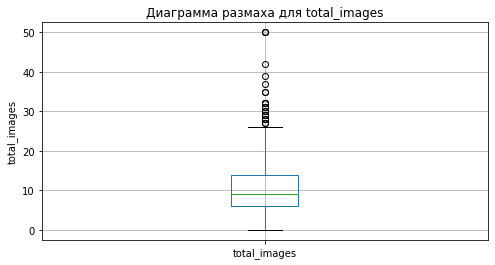

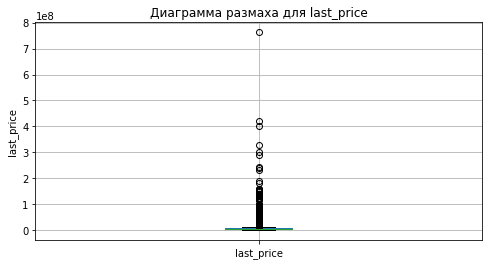

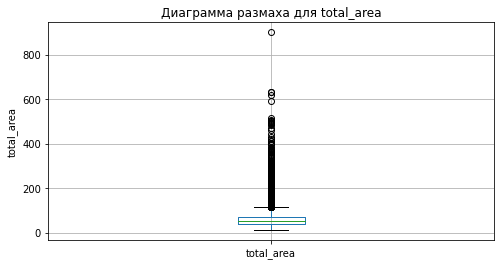

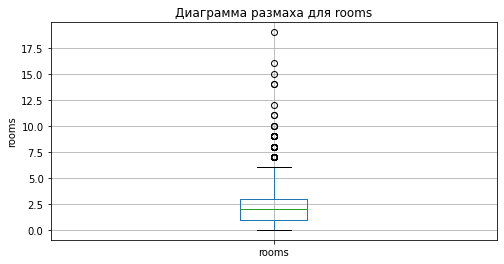

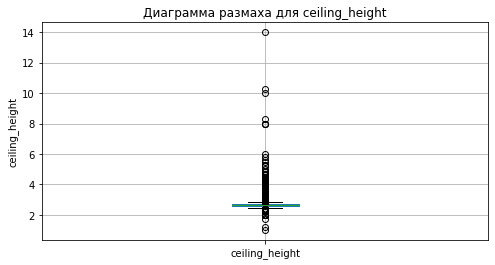

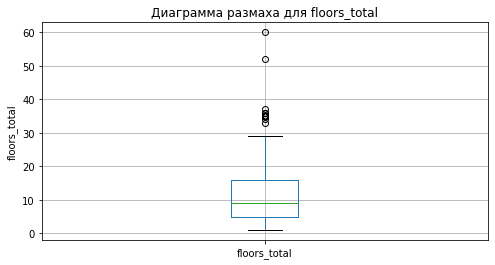

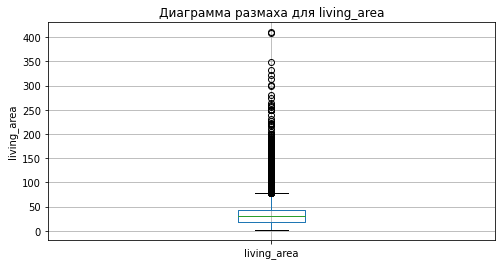

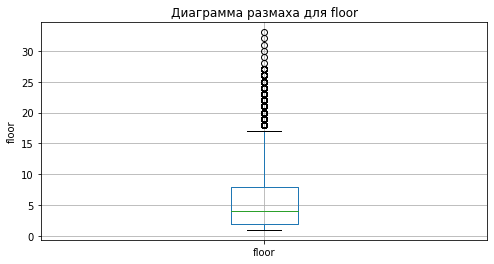

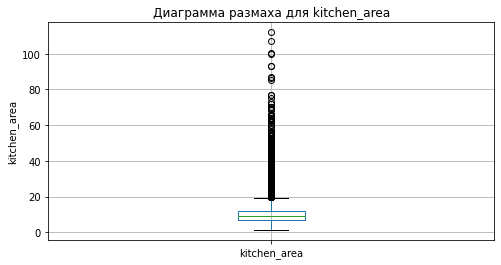

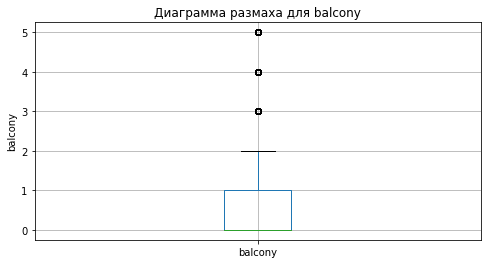

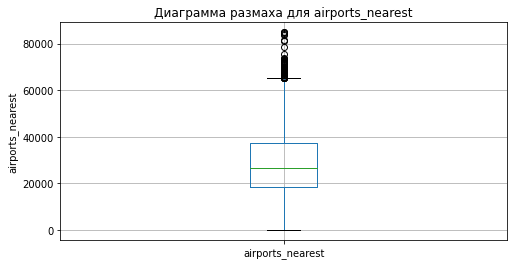

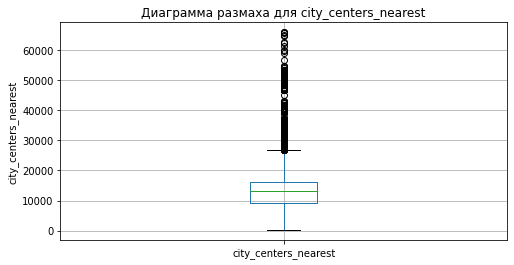

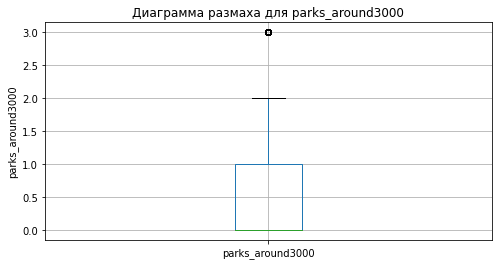

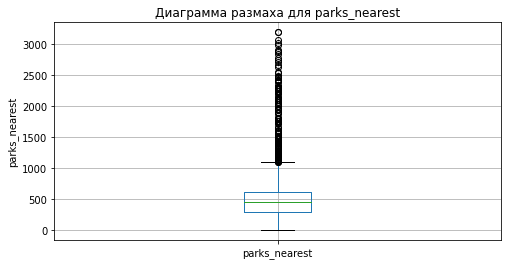

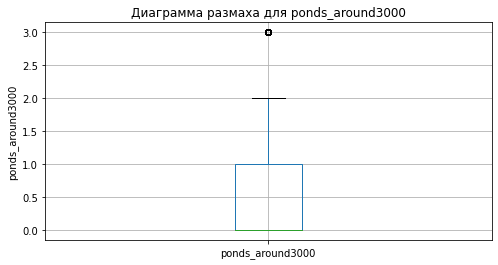

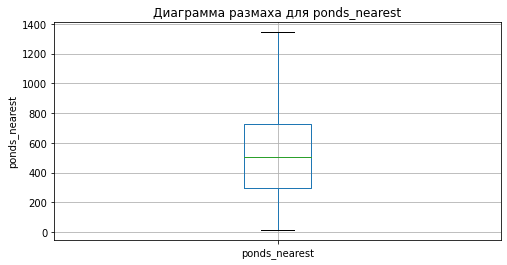

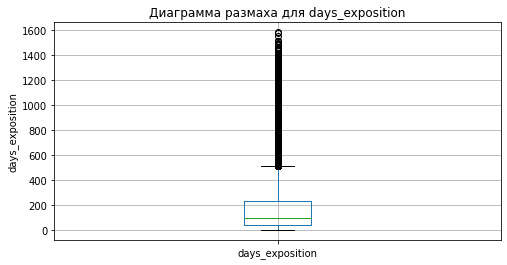

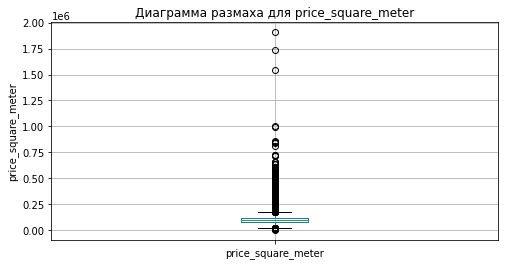

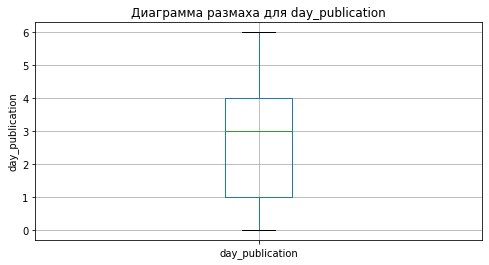

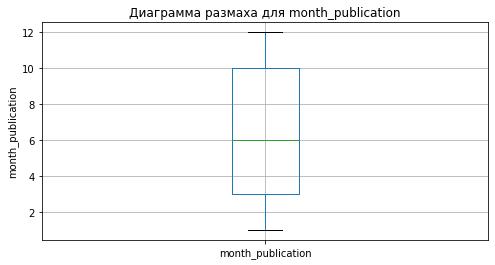

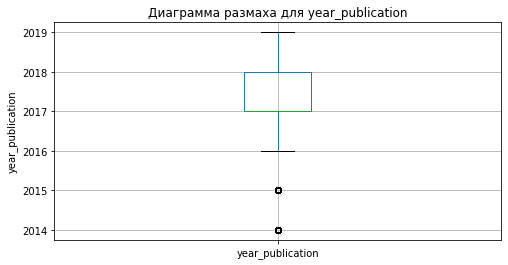

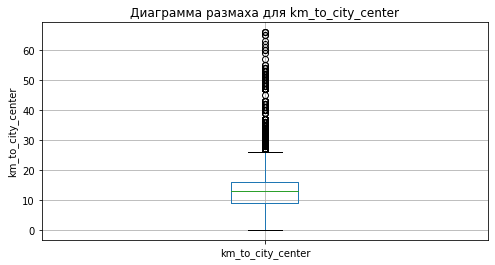

In [42]:
# Выбор только числовых столбцов
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    try:
        df.boxplot(column=column)
        plt.title(f"Диаграмма размаха для {column}")
        plt.ylabel(column)
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Ошибка для столбца {column}: {e}")

Исходя из выше показанных диаграмм уберем выбросы из нашего набора данных. Для этого выберем основные параметры, а именно: last_price, total_area, rooms, kitchen_area, balcony 

In [43]:
print("Было:", df.shape[0])

Было: 23613


In [44]:
clean_data=df.query("last_price<100_000_000 and total_area<100 and rooms<7 and 2<kitchen_area<40 and balcony<3")
clean_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_apartment_floor,km_to_city_center
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,NaN,0,NaN,81.0,"82,920.8",1,12,2018,первый,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,90.0,2,574.0,558.0,"92,785.7",3,8,2015,другой,14.0
5,10,"2,890,000.0",30.4,2018-09-10,1,2.6,12.0,14.4,5,False,...,NaN,0,NaN,55.0,"95,065.8",0,9,2018,другой,NaN
6,6,"3,700,000.0",37.3,2017-11-02,1,2.6,26.0,10.6,6,False,...,NaN,0,NaN,155.0,"99,195.7",3,11,2017,другой,19.0
7,5,"7,915,000.0",71.6,2019-04-18,2,2.6,24.0,30.5,22,False,...,NaN,0,NaN,NaN,"110,544.7",3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,"4,600,000.0",62.4,2016-08-05,3,2.6,9.0,40.0,8,False,...,352.0,1,675.0,239.0,"73,717.9",4,8,2016,другой,34.0
23695,14,"3,100,000.0",59.0,2018-01-15,3,2.6,5.0,38.0,4,False,...,NaN,0,NaN,45.0,"52,542.4",0,1,2018,другой,NaN
23696,18,"2,500,000.0",56.7,2018-02-11,2,2.6,3.0,29.7,1,False,...,NaN,0,NaN,NaN,"44,091.7",6,2,2018,первый,NaN
23697,13,"11,475,000.0",76.8,2017-03-28,2,3.0,17.0,30.5,12,False,...,173.0,3,196.0,602.0,"149,511.4",1,3,2017,другой,10.0


In [45]:
print("Стало:", clean_data.shape[0])
print("Проценты от исходных: {:.0%}".format(clean_data.shape[0]/df.shape[0]))

Стало: 21234
Проценты от исходных: 90%


**Анализ общей площади**

In [46]:
clean_data['total_area'].describe()

count   21,234.0
mean        52.4
std         17.2
min         12.0
25%         39.0
50%         49.0
75%         63.0
max         99.9
Name: total_area, dtype: float64

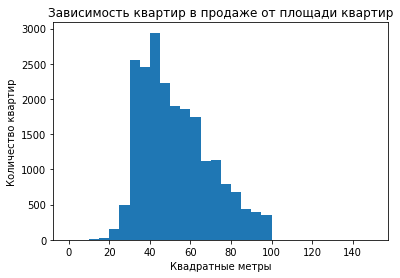

In [47]:
plt.hist(clean_data['total_area'], bins=30, range=(0,150))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

В наборе данных преобладают объекты общей площадью 30-50 кв.м.

**Анализ жилой площади**

In [48]:
clean_data['living_area'].describe()

count   21,234.0
mean        29.9
std         12.3
min          2.0
25%         18.0
50%         29.3
75%         39.0
max         91.8
Name: living_area, dtype: float64

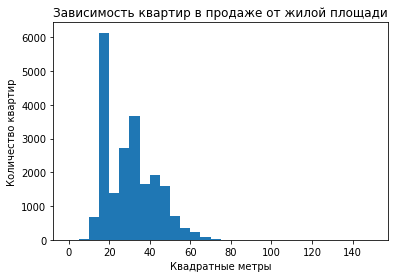

In [49]:
plt.hist(clean_data['living_area'], bins=30, range=(0,150))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Среди продаваемых объектов недвижимости больше всего объектов с жилой площадью 15-20 кв.м.

**Анализ площади кухни**

In [50]:
clean_data['kitchen_area'].describe()

count   21,234.0
mean         9.5
std          3.8
min          2.1
25%          7.0
50%          9.0
75%         11.0
max         39.7
Name: kitchen_area, dtype: float64

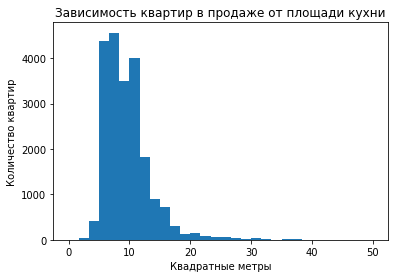

In [51]:
plt.hist(clean_data['kitchen_area'], bins=30, range=(0,50))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Частая встречаемая площадь кухонь 5-15 кв. м.

**Анализ цены**

In [52]:
clean_data['last_price'].describe()

count       21,234.0
mean     5,016,858.3
std      2,884,662.7
min        430,000.0
25%      3,300,000.0
50%      4,400,000.0
75%      6,000,000.0
max     53,000,000.0
Name: last_price, dtype: float64

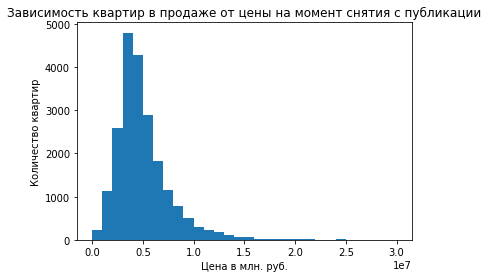

In [53]:
plt.hist(clean_data['last_price'], bins=30, range=(0,3e7))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

Наиболее частая цена объекта 3,5-5 млн.руб.

**Количество комнат**

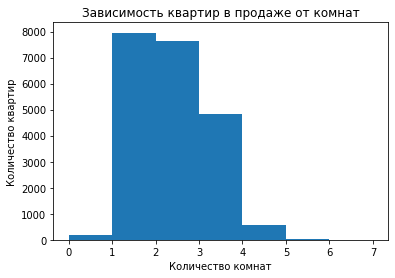

In [54]:
plt.hist(clean_data['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Больше всего проедается 1 комнатных и 2 комнатных квартир,что соответствует рынку недвижимости.

**Высота потолков**

In [55]:
clean_data['ceiling_height'].describe()

count   21,234.0
mean         2.7
std          0.2
min          1.0
25%          2.6
50%          2.6
75%          2.7
max         14.0
Name: ceiling_height, dtype: float64

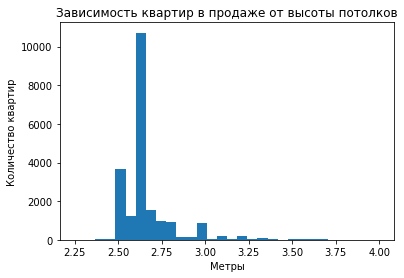

In [56]:
plt.hist(clean_data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=30, range=(2.25,4))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Наиболее часто встречающиеся высоты потолков 2,5 и 2,6 м.

**Тип этажа квартиры («первый», «последний», «другой»)**

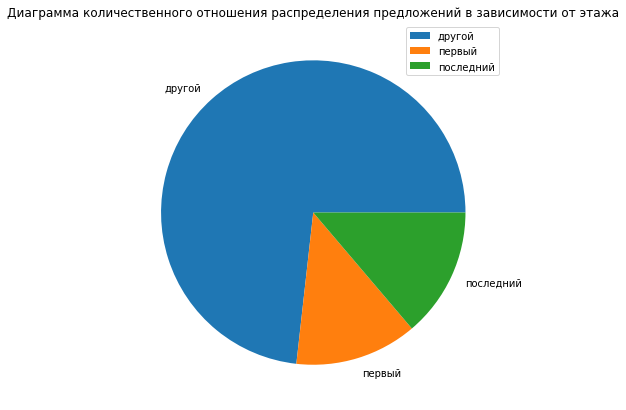

In [57]:
clean_data.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

Квартиры на первом и последнем этаже продаются реже. Большинство квартир продаются на других этажах

**Общее количество этажей в доме**

In [58]:
clean_data['floors_total'].describe()

count   21,234.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

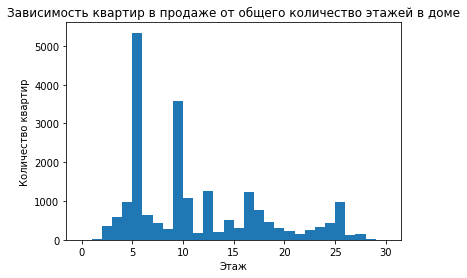

In [59]:
plt.hist(clean_data['floors_total'], bins=30,range=(0,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Наибольшее число квартир продавалось в 5-этажных и 9-этажных домах.

**Расстояние до центра города в метрах**

In [60]:
clean_data['city_centers_nearest'].describe()

count   15,921.0
mean    14,798.0
std      8,521.1
min        208.0
25%     10,364.0
50%     13,490.0
75%     16,603.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

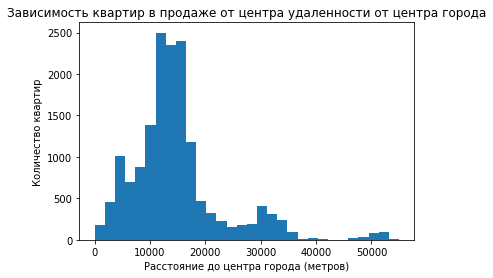

In [61]:
plt.hist(clean_data['city_centers_nearest'], bins=30, range=(0,55000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего продавались объекты, удаленные от центра от 12000 м. до 16000 м.

**Расстояние до ближайшего парка**

In [62]:
clean_data['parks_nearest'].describe()

count   6,725.0
mean      493.2
std       340.4
min         1.0
25%       289.0
50%       456.0
75%       615.0
max     3,190.0
Name: parks_nearest, dtype: float64

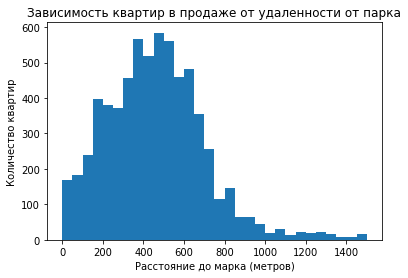

In [63]:
plt.hist(clean_data['parks_nearest'], bins=30, range=(0,1500))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего расстояние до парка среди продаваемых квартир составляет 450 м.

**Данные по дню публикации объявлений**

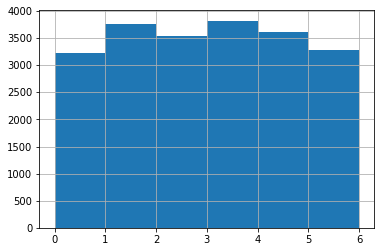

In [64]:
clean_data['day_publication'].hist(bins=6)
plt.show()

Размещение объявлений по дням недели происходило примерно равномерно

**Данные по месяцу публикации объявлений**

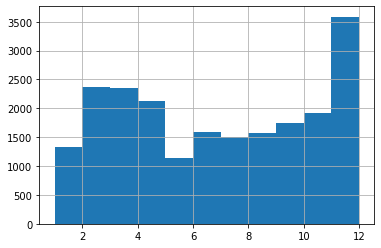

In [65]:
clean_data['month_publication'].hist(bins=11)
plt.show()

Больше всего объявлений о продаже опубликовано в последний месяц года.

**Данные по году публикации объявлений**

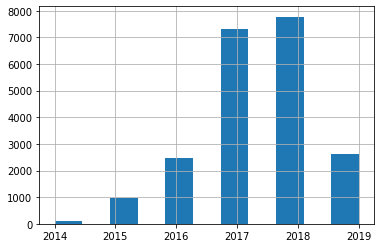

In [66]:
clean_data['year_publication'].hist(bins=11)
plt.show()

Больше всего объявлений о продаже опубликовано в 2018 году.

In [67]:
clean_data['days_exposition'].value_counts().head(20)

45.0    862
60.0    517
7.0     218
30.0    197
4.0     165
3.0     150
5.0     144
14.0    141
9.0     133
44.0    132
20.0    130
8.0     128
90.0    127
11.0    125
13.0    123
10.0    122
18.0    121
6.0     119
22.0    118
19.0    117
Name: days_exposition, dtype: int64

In [68]:
clean_data['days_exposition'].mean()

172.4501450521113

In [69]:
clean_data['days_exposition'].median()

91.0

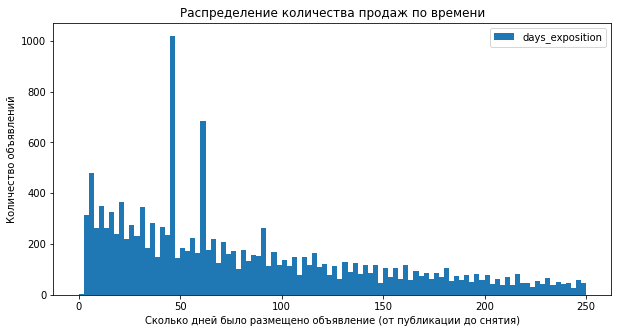

In [70]:
clean_data.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5), range=(0,250))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

Всплески на 45 и 60 днях, говорят нам о какой-то технической проблеме платформы. Среднее время продажи 172 дня (2-3 месяца), медианна 95 дней (1.5 месяца), тем самым медианна значительно отличается от среднего. Быстрая продажа та, где квартиру успели продать за первые 120 дней (3-4 месяца), после вероятность продажи квартиры падает (долгая продажа). 

**Общая тепловая карта корреляции**

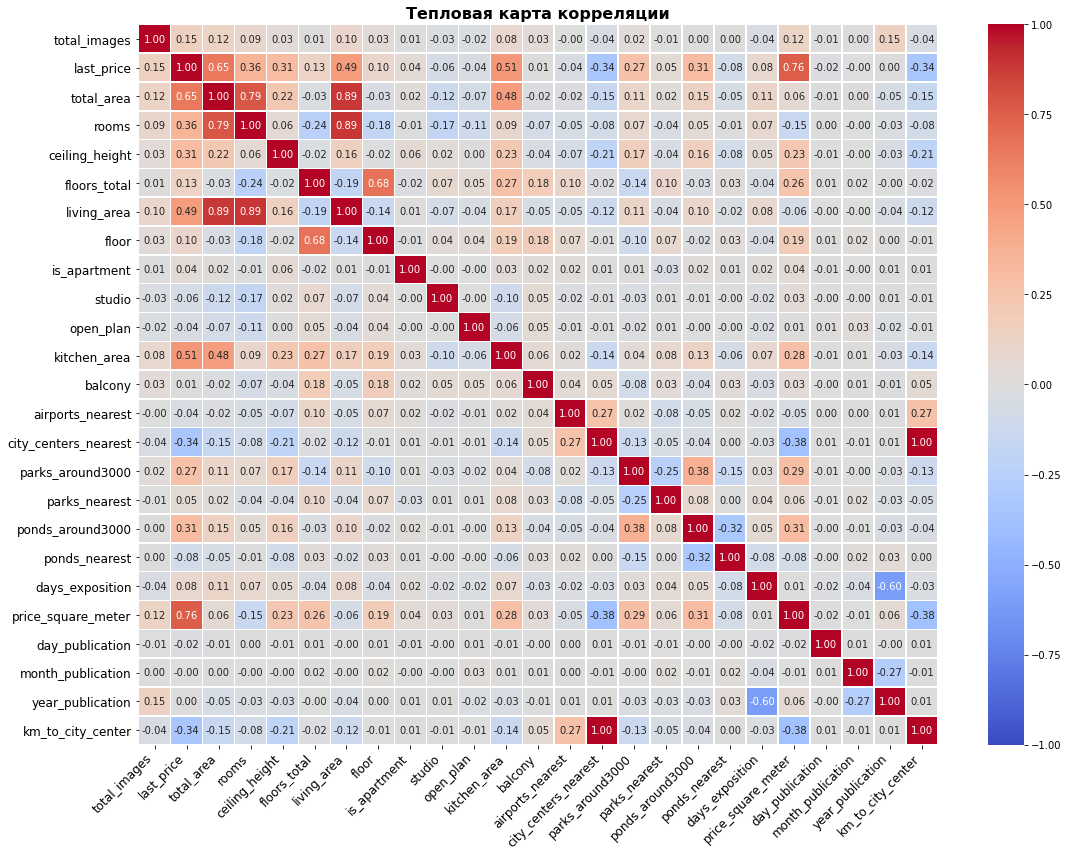

In [71]:
# Рассчитаем корреляционную матрицу
correlation_matrix = clean_data.corr()

plt.figure(figsize=(16, 12))  # Увеличим размер графика
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    vmin=-1, vmax=1, 
    annot_kws={"size": 10}
)

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.title('Тепловая карта корреляции', fontsize=16, fontweight='bold') 

plt.tight_layout()
plt.show()

**Зависимость цены от общей площади объекта**

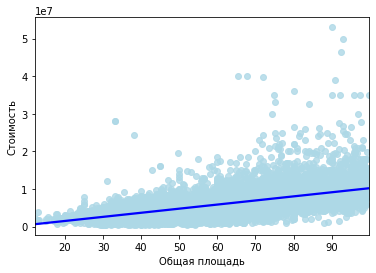

In [72]:
sns.regplot(
    x='total_area', 
    y='last_price', 
    data=clean_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Общая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

С ростом общей площади растет и цена, при этом также увеличивается разброс цен

In [73]:
clean_data['total_area'].corr(clean_data['last_price']).round(2)

0.65

**Зависимость цены от жилой площади объекта**

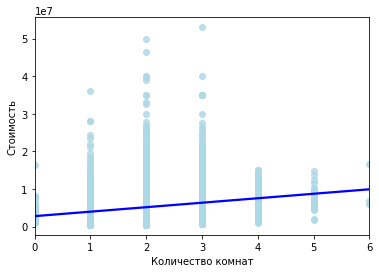

In [74]:
sns.regplot(
    x='rooms', 
    y='last_price', 
    data=clean_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Количество комнат')
plt.ylabel(
    'Стоимость')
plt.show()

In [75]:
df['rooms'].corr(df['last_price']).round(2)

0.36

Рассчитанный коэффциент корреляции ниже, чем коэффициент для общей площади. В целом прослеживается рост цен с ростом количества комнат

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)**

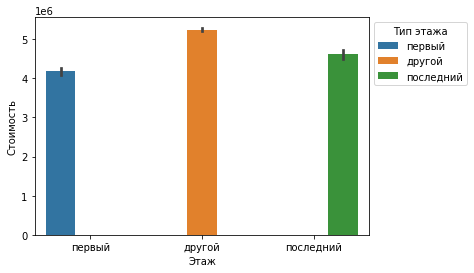

In [76]:
sns.barplot(
    x='type_apartment_floor', 
    y='last_price', 
    data=clean_data,
    hue="type_apartment_floor")
plt.xlabel(
    'Этаж')
plt.ylabel(
    'Стоимость')

plt.legend(title= "Тип этажа", bbox_to_anchor=(1, 1))

plt.show()

Самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже.

**Зависимость цены от дня недели размещения объявления**

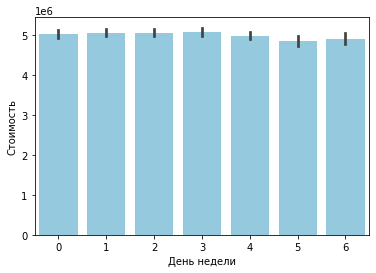

In [77]:
sns.barplot(
    x='day_publication', 
    y='last_price', 
    data=clean_data,
    color='skyblue')
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')

plt.show()

Дороже всего продавались квартиры, размещенные в четверг.

**Зависимость цены от месца размещения объявления**

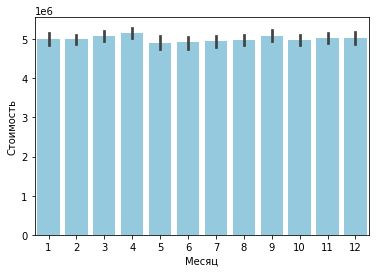

In [78]:
sns.barplot(
    x='month_publication', 
    y='last_price', 
    data=clean_data,
    color='skyblue')
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

Дешевле всего продавались квартиры, размещенные в объявлениях в летний период, а дороже всего - размещенные в весенний. В целом сезонность слабо прослеживается (также видно по коэфф корреляции)

**Зависимость цены от года размещения объявления**

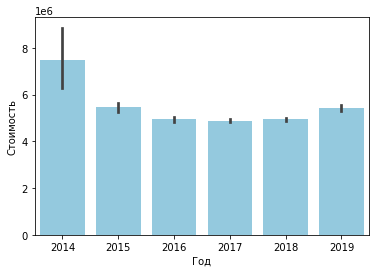

In [79]:
sns.barplot(
    x='year_publication', 
    y='last_price', 
    data=clean_data,
    color='skyblue')
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')
plt.show()

Цены на квартиры падали с каждым годом,после 2018 года цены начали расти. Самая большая стоимость квартир в 2014 году

**Медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [80]:
median_prices = clean_data.groupby('locality_name')['price_square_meter']\
                        .agg(['count','median'])\
                        .sort_values(by='count', ascending=False).head(10)
median_prices

,count,median
locality_name,,
Санкт-Петербург,13606,"103,448.3"
Мурино,570,"86,365.0"
Кудрово,461,"95,522.4"
Шушары,421,"77,272.7"
Всеволожск,378,"65,789.5"
Пушкин,331,"98,472.0"
Парголово,324,"91,984.4"
Колпино,323,"74,657.5"
Гатчина,291,"67,796.6"


In [81]:
#минимальная стоимость квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений)
median_prices[median_prices['median'] == median_prices['median'].min()]

,count,median
locality_name,,
Выборг,220,"58,357.4"


In [82]:
#максимальная стоимость квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений)
median_prices[median_prices['median'] == median_prices['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,13606,"103,448.3"


**Стоимость объектов в зависимости от расстояния до центра в километрах**

In [83]:
prices_km_to_center = clean_data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='km_to_city_center', values='price_square_meter')
prices_km_to_center

,price_square_meter
km_to_city_center,
0.0,"244,774.9"
1.0,"151,171.4"
2.0,"143,036.2"
3.0,"118,263.6"
4.0,"129,248.4"
5.0,"134,893.8"
6.0,"131,596.5"
7.0,"128,700.5"
8.0,"121,135.6"


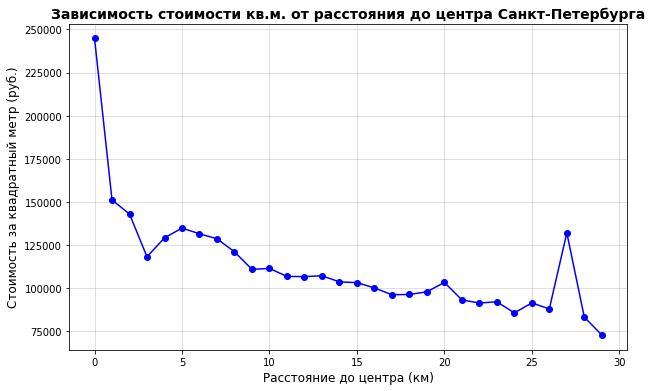

In [84]:
plt.figure(figsize=(10, 6))

plt.plot(
    prices_km_to_center.index, 
    prices_km_to_center['price_square_meter'], 
    marker='o', 
    linestyle='-', 
    color='blue', 
    label='Стоимость за квадратный метр'
)

plt.xlabel('Расстояние до центра (км)', fontsize=12)
plt.ylabel('Стоимость за квадратный метр (руб.)', fontsize=12)
plt.title('Зависимость стоимости кв.м. от расстояния до центра Санкт-Петербурга', fontsize=14, fontweight='bold')

plt.grid(alpha=0.5)

plt.show()

График и сводная таблица хорошо отражают, что с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это возможно связано с нахождением элитного района.

### Общий вывод

**Предобработка и анализ данных о продаже квартир**

Мы провели анализ данных сервиса Яндекс.Недвижимость, используя архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Исходно объем данных составлял 23 699 строк, но после предобработки он был сокращен до 23 449 строк.

1. **Обработка пропусков**

При анализе данных мы обнаружили наибольшее количество пропусков в столбце is_apartment. Мы сделали следующие выводы и решения по обработке пропусков:

**Столбец is_apartment**: Пропуски, вероятно, связаны с тем, что объекты недвижимости не являются апартаментами. Поэтому пропуски были заменены на значение False.

**Столбец balcony**: Пропуски в данном столбце, вероятно, означают отсутствие балконов в объектах недвижимости, поэтому они были заменены на 0.

**Столбец living_area**: Пропуски в жилой площади были заполнены с использованием медианного значения living_area.

**Столбец kitchen_area**: Пропуски в площади кухни были заполнены 0, т.к студии не имеют выделенной площади для кухни.

**Столбец ceiling_height**: Пропуски в высоте потолков были заменены медианным значением, так как это непрерывный параметр с небольшим влиянием на общие выводы.

**Столбцы locality_name и floors_total**: Пропуски в этих столбцах были отброшены, так как их количество было незначительным.
2. **Изменение типов данных**

Мы изменили типы данных в нескольких столбцах для удобства последующего анализа:

Преобразовали столбцы с датами, такими как first_day_exposition, в тип datetime.

Столбцы с числовыми данными, такими как floors_total, balcony, были приведены к соответствующим числовым типам.

3. **Поиск и обработка дубликатов**

Мы провели анализ дубликатов и унифицировали написания названий населённых пунктов.

4. **Исключение выбивающихся значений**

После анализа выбивающихся значений мы исключили следующие данные:

Квартиры стоимостью более 100 млн рублей.

Объекты с общей площадью более 100 кв.м.

Квартиры с числом комнат более 7.

Квартиры с площадью кухни более 40 но менее 2.

5. **Дополнительные вычисления**

Мы добавили несколько новых столбцов для дальнейшего анализа:

Стоимость одного квадратного метра.

День недели, месяц и год публикации объявления.

Тип этажа квартиры.

Расстояние до центра города в километрах.

6. **Исследовательский анализ данных**

**Типы наиболее продаваемых объектов**

Анализ показал, что наиболее продаваемые квартиры — это 1-2 комнатные квартиры на 2-м этаже 5-этажного дома, с общей площадью 40-45 кв.м., жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м. Средняя стоимость таких квартир — 3,5-5 млн рублей. Высота потолков — 2,6 м, квартиры находятся в 12-16 км от центра города, в 450 м от ближайшего парка и в 12-14 км от аэропорта.

**Сезонность продажи**

Был замечен резкий рост числа объявлений в конце года. Сезонность по месяцам не выявлена. Наибольшее количество обьявления в 2018 году

**Скорость продажи**

Среднее время продажи квартиры составило 172 дня, но медианное значение времени продажи — 95 дней. Чаще всего квартиры продавались на 45-й и 60-й день после публикации объявления (возможно связано с тех. особенностью платфоромы. В целом средний период быстрых продаж до 120 дней, в дальнейшем вероятность продать квартиру падает. Были обнаружены долгие продажи, продолжавшиеся более 4 лет.

**Факторы, влияющие на цену**

Наибольшее влияние на цену оказывает полная площадь квартиры. Квартиры на первом этаже продаются по самым низким ценам, а на этажах, не являющихся первыми или последними, — по более высоким ценам. Также более высокие цены были замечены в объявлениях, размещённых в сентябре и декабре по субботам, а наименьшие — в октябре.

**Динамика цен**

С 2014 года наблюдается снижение цен на квартиры. В 2018 году были зафиксированы минимальные цены, после чего начался рост.

**Стоимость квадратного метра**

Самая низкая стоимость квадратного метра наблюдается в Выборге, а самая высокая — в Санкт-Петербурге. Кроме того, с удалением от центра Санкт-Петербурга стоимость квадратного метра в целом уменьшается, хотя на расстояниях от 4 до 7 км, также 27 км от центра наблюдаются аномальные повышения цен. Это может быть связано с наличием элитных жилых районов в этих местах.